# Python for Scientists


## 1. Introduction

In [21]:
print("Hello World!")

Hello World!


### 1.1 Notebook and Cells

**Cells** are the basic elements of a Jupyter notebook, they are extensible extensible but for the sake of this workshop they are used to run python code and render markdown.

**This is a markdown cell**

Markdown is a markup language used commonly for documents.

- They can include lists
- [Embedded Links](google.com)

> Quotes

```python
def TheyCanEvenIncludeCodeSnippets():
    pass
```

They can also contain inline $\LaTeX$

or multiline equations.

$$
\sum_{n=1}^{N} = \frac{n (n+1)}{2}
$$

In [30]:
# This is a python cell

# you can define variables
x = "Tor"

# and functions
def foo():
    return "onto"

In [31]:
# and use them in later cells
print(x + foo())

Toronto


### 1.2 Numpy

Numerical Python Library: fast linear algebra in Python.

**`ndarray`**: n-dimensional array, is the core of the numpy library, almost every function in numpy can operate on both scalars and arrays of arbitrary dimension.

Let's say we want to predict the weather next week. We know that likelihood of the weather tomorrow depends on the weather today by this table (**Markov Chain**):

|      | rain | clear|
|------|------|------|
|rain  | 0.3  | 0.7  |
|clear | 0.1  | 0.9  |

And we know the probability distribution of a discrete markov process evolves subject to:

$$
\begin{align}
x_n &= x_{n-1} P\\
&= x_{n-1}
\begin{bmatrix}
0.3 & 0.7\\
0.1 & 0.9\\
\end{bmatrix}
\end{align}
$$

In [110]:
import numpy as np

# transition probabilities
rain_transitions = [0.3, 0.7]
clear_transitions = [0.1, 0.9]

# Numpy arrays can be initialized from python lists
state = np.array([1, 0])

# and multidimenional lists
probs = np.array([rain_transitions,
                  clear_transitions])

for i in range(7):
    state = state.dot(probs)
    
    print("P(x) after {i} day(s) is {state}".format(i=i + 1, state=state))

P(x) after 1 day(s) is [0.3 0.7]
P(x) after 2 day(s) is [0.16 0.84]
P(x) after 3 day(s) is [0.132 0.868]
P(x) after 4 day(s) is [0.1264 0.8736]
P(x) after 5 day(s) is [0.12528 0.87472]
P(x) after 6 day(s) is [0.125056 0.874944]
P(x) after 7 day(s) is [0.1250112 0.8749888]


After an arbitrary number of days the distribution is:

$$
\begin{align}
x_n &= x_{n-1} P\\
&= (x_{n-2} P ) P\\
&= x_{n-2} P^2\\
&=\ldots \\
&= x_{0} P^n
\end{align}
$$

In [114]:
initial_state = np.array([1, 0])

P_n = np.linalg.matrix_power(probs, 14)

initial_state.dot(P_n)

array([0.125, 0.875])

### 1.3 Matplotlib

Scientific Python plotting library, familiar interface for those who've worked with Matlab.


In [121]:
# This cell contains a cell magic, these begin with a % and behave differently from python code.
# This cell magic tells matplotlib to render figures inside the notebook.
%matplotlib inline

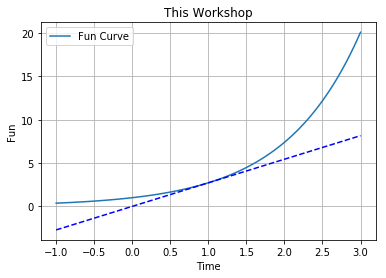

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Returns an array of points
x = np.linspace(start=-1, stop=3.0, num=100, endpoint=True)

y_1 = np.exp(x) # Example of a ufunc
y_2 = np.e * x # Example of broadcasting

plt.title("This Workshop")
plt.xlabel("Time")
plt.ylabel("Fun")

plt.plot(x, y_1, label="Fun Curve")
plt.plot(x, y_2, "b--")

plt.grid(True)
plt.legend()

plt.show()

In [146]:
from ipywidgets import interact

x = np.linspace(start=-1, stop=3.0, num=100, endpoint=True)
y_1 = np.exp(x) # Example of a ufunc

def plot_fun_graph(p=1.0):
    # tangent line equation
    m = np.exp(p)
    b = np.exp(p) - m * p
    
    y_2 = m * x + b

    plt.title("This Workshop")
    plt.xlabel("Time")
    plt.ylabel("Fun")

    plt.plot(x, y_1, label="Fun Curve")
    plt.plot(x, y_2, "b--")

    plt.grid(True)
    plt.legend()

    plt.ylim([0, 20])
    plt.xlim([-1, 3])

interact(plot_fun_graph, p=(0., 3., .01))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='p', max=3.0, step=0.01), Output()), _dom_classes=('widget-interact',))

### 1.4 Scipy

Scipy: Common scientific computing functionality built on numpy

- `interpolation`
- `fftpack`
- `optimize`

#### 1.4.1 Interpolation

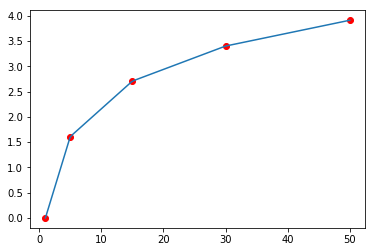

In [389]:
from scipy.interpolate import interp1d

x = np.array([1, 5, 15, 30, 50])
y = np.log(x)

f = interp1d(x, y, kind="linear")

x2 = np.linspace(start=1, stop=50, num=100)

plt.plot(x, y, "ro")
plt.plot(x2, f(x2))
plt.show()

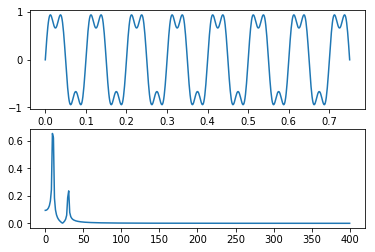

In [365]:
from scipy.interpolate import interp1d
from scipy.fftpack import fft

f1 = 10.0
f2 = 30.0

N = 600
T = 1 / 800.0

x = np.linspace(start=0, stop=N * T, num=N)
y = np.sin(f1 * np.pi * 2 * x) + np.sin(f2 * np.pi * 2 * x) / 3

yf = fft(y)
xf = np.linspace(0, 1 / (2.0 * T), N // 2)

plt.subplot(2, 1, 1)
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.plot(xf, np.abs(2.0 / N * yf[:N//2]))

plt.show()

#### 1.4.2 Optimization

Rosenbrock's valley function:
$$
f(x, y) = (a - x)^2 + b (y - x^2)^2
$$
minimized when
$$
(x, y) = (a, a^2)
$$

In [317]:
from mpl_toolkits.mplot3d import Axes3D


def rosenbrock(X, a=1, b=100):
    x, y = X

    return (a - x)**2 + b * (y - x**2)**2

x = np.linspace(-2, 2)
y = np.linspace(-1.0, 3)

X, Y = np.meshgrid(x, y)

Z = rosenbrock((X, Y))


def plot_rosenbrock(angle=240):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap="jet")
    ax.view_init(45, angle)

interact(plot_rosenbrock, angle=(0, 360))
plt.show()

interactive(children=(IntSlider(value=240, description='angle', max=360), Output()), _dom_classes=('widget-interact',))

In [321]:
from scipy.optimize import minimize

minimize(rosenbrock, x0=(0, 1), method="nelder-mead")

 final_simplex: (array([[1.00000205, 1.00000565],
       [0.99996743, 0.99993257],
       [0.99996276, 0.99992823]]), array([2.42887199e-10, 1.58293615e-09, 2.11970761e-09]))
           fun: 2.4288719914788363e-10
       message: 'Optimization terminated successfully.'
          nfev: 191
           nit: 101
        status: 0
       success: True
             x: array([1.00000205, 1.00000565])

## 2. scikits

General extension libraries to scientific python.

- [scikit-image](http://scikit-image.org/): image processing and computer vision
- [scikit-learn](http://scikit-learn.org/stable/): machine learning
- [scikit-optimize](https://scikit-optimize.github.io/): bayesian optimization